In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.2.0


In [7]:
import sklearn
from sklearn.model_selection import train_test_split
import os

In [5]:
    !wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
      -O /tmp/rockpaperscissors.zip

--2020-07-31 15:05:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.82MB/s    in 50s     

2020-07-31 15:06:45 (6.15 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
pip install split_folders

In [8]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
   # mengecek sudah terbaca belum
   os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'paper', 'rps-cv-images', 'scissors']

In [10]:
import split_folders
#membuat direktori awal dan direktori split
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
split_folders.ratio(base_dir, output='/tmp/rockpaperscissors/rps-cv-images', seed = 1337, ratio = (.6,.4))
#revisi ratio menjadi train 60% dengan .6 dan validation 40% dengan .4

#membuat direktori train dan validation  
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

Copying files: 2188 files [00:00, 2912.76 files/s]


In [ ]:
# os.rmdir(train_dir)
# os.rmdir(validation_dir)

In [11]:
#memecah direktori menjadi data train dan data validation
#rock
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
#paper
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
#scissors
# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [12]:
#lanjutan memecah direktori data train 
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#lanjutan memecah direktori data validation
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [13]:
#membuat sebuah objek ImageDataGenerator untuk data training dan data testing
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
# membuat arsitektur CNN 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [20]:
#menentukan loss function serta optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
#melatih model menggunakan metode fit
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 39s - loss: 0.0576 - accuracy: 0.9800 - val_loss: 0.0295 - val_accuracy: 0.9875
Epoch 2/20
25/25 - 39s - loss: 0.0428 - accuracy: 0.9837 - val_loss: 0.2705 - val_accuracy: 0.9500
Epoch 3/20
25/25 - 39s - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0790 - val_accuracy: 0.9750
Epoch 4/20
25/25 - 39s - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.0960 - val_accuracy: 0.9688
Epoch 5/20
25/25 - 39s - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.0158 - val_accuracy: 0.9937
Epoch 6/20
25/25 - 43s - loss: 0.0664 - accuracy: 0.9850 - val_loss: 0.0270 - val_accuracy: 0.9937
Epoch 7/20
25/25 - 38s - loss: 0.0302 - accuracy: 0.9937 - val_loss: 0.0217 - val_accuracy: 0.9937
Epoch 8/20
25/25 - 38s - loss: 0.0516 - accuracy: 0.9887 - val_loss: 0.0267 - val_accuracy: 0.9875
Epoch 9/20
25/25 - 38s - loss: 0.0179 - accuracy: 0.9937 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 38s - loss: 0.0290 - accuracy: 0.9875 - val_loss: 0.0686 - val_accuracy: 0.9875
Epoch 11/

Using TensorFlow backend.


Saving 6drquJLYR4bjZX2E.png to 6drquJLYR4bjZX2E.png
6drquJLYR4bjZX2E.png
scissors


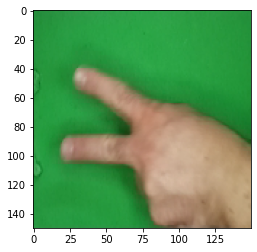

In [22]:
#membuat input classifier
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')